In [1]:
# Packages
import scanpy as sc # package for scRNA-seq data analysis
import numpy as np
import pandas as pd
import os
import scvi
import scanpy.external as sce

os.chdir('D:/OneDrive - International Campus, Zhejiang University/CAR_T_data') # Change pathway

Global seed set to 0


In [5]:
adata = sc.read('adata_pp.h5ad')

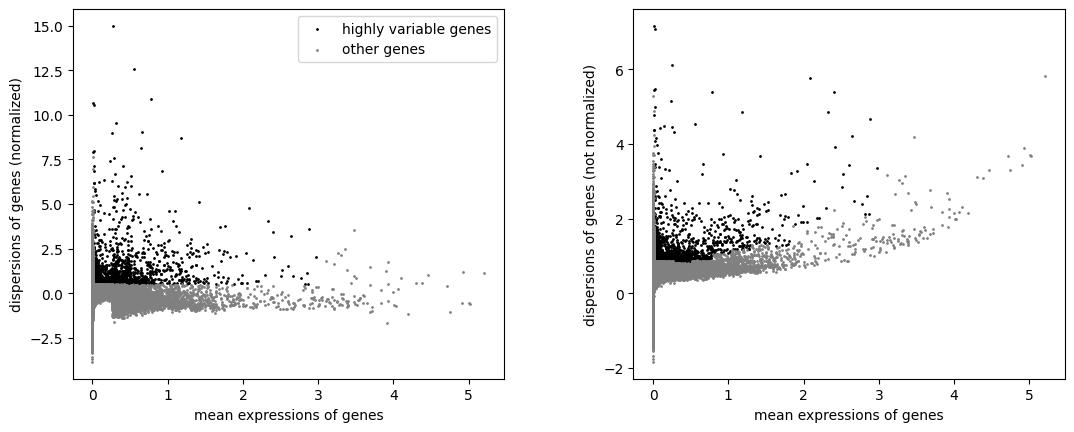

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# ComBat batch correction
# sc.pp.combat(adata, key='sample_name')
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
sc.pp.scale(adata, max_value=10)

sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])
adata_HVG = adata[:, adata.var.highly_variable]


d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


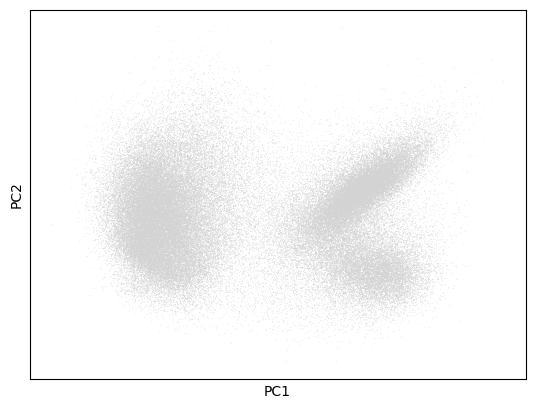

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


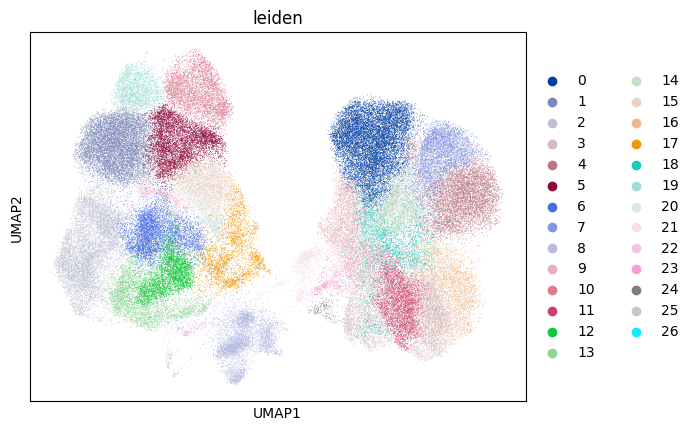

In [7]:
sc.pp.pca(adata_HVG)
sc.pl.pca(adata_HVG)

# UMAP
sc.pp.neighbors(adata_HVG, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_HVG)
sc.tl.umap(adata_HVG)
sc.pl.umap(adata_HVG, color = 'leiden')

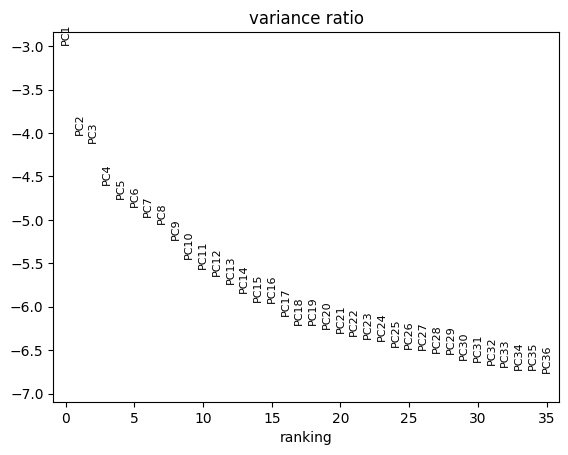

In [10]:
sc.pl.pca_variance_ratio(adata_HVG, log=True, n_pcs=35)

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


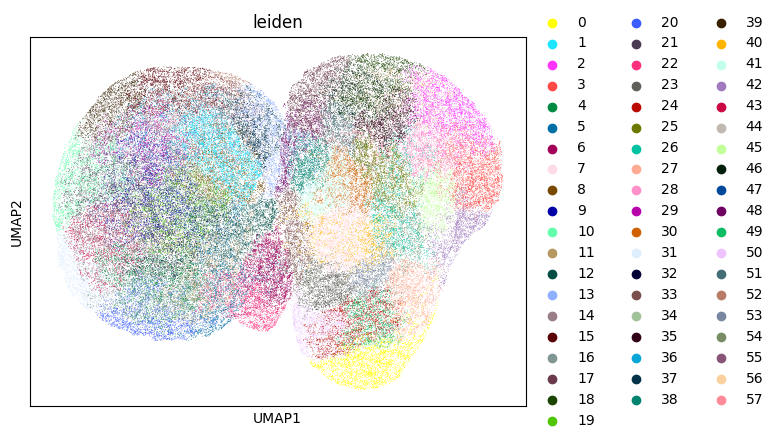

In [11]:
# UMAP
sc.pp.neighbors(adata_HVG, n_neighbors=10, n_pcs=3)
sc.tl.leiden(adata_HVG)
sc.tl.umap(adata_HVG)
sc.pl.umap(adata_HVG, color = 'leiden')

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


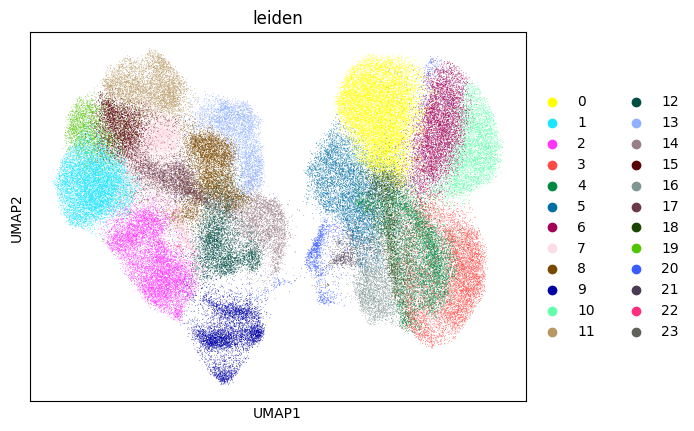

In [12]:
# UMAP
sc.pp.neighbors(adata_HVG, n_neighbors=10, n_pcs=16)
sc.tl.leiden(adata_HVG)
sc.tl.umap(adata_HVG)
sc.pl.umap(adata_HVG, color = 'leiden')

In [24]:
adata.obs = adata_HVG.obs

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


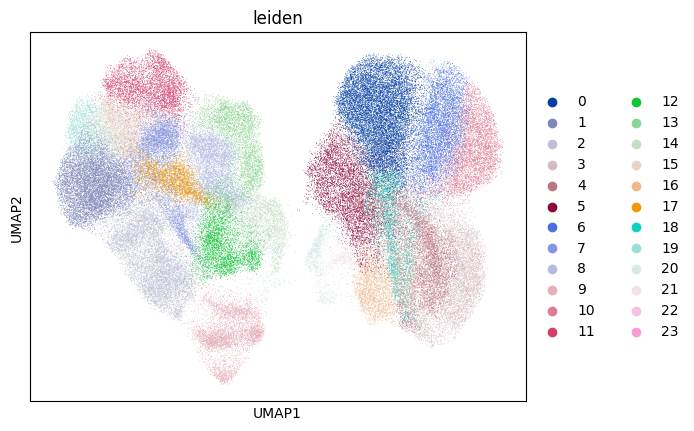

In [25]:
sc.pl.umap(adata, color = 'leiden')

In [26]:
adata.write("adata_umap.h5ad")

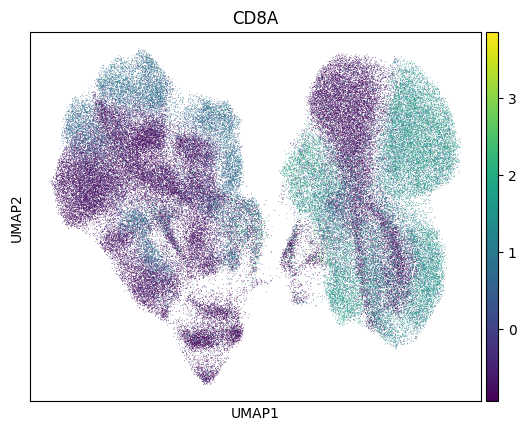

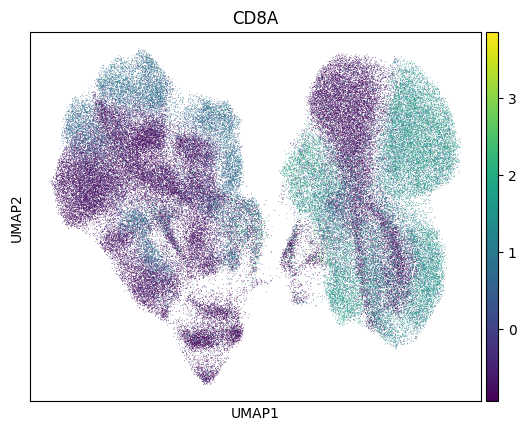

In [29]:
sc.pl.umap(adata, color = 'CD8A')
sc.pl.umap(adata_HVG, color = 'CD8A')
